In [36]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt


# Loading Dataset

In [50]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [51]:
print(x_train.shape)

(50000, 32, 32, 3)


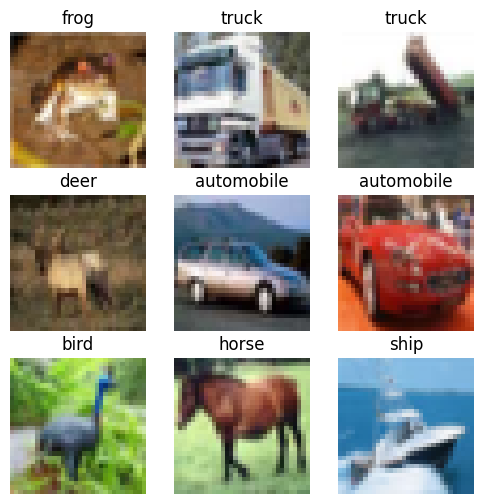

In [52]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(6, 6))
for i in range(9):
  image, label = x_train[i], y_train[i]
  fig.add_subplot(3, 3, i+1)
  plt.imshow(image)
  plt.title(classes[label[0]])
  plt.axis('off')


In [53]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Creating Model

In [54]:
def Inception(x, filters):
  x11 = Conv2D(filters=filters[0], kernel_size=1, padding='same', activation='relu')(x)

  x33 = Conv2D(filters=filters[1], kernel_size=1, padding='same', activation='relu')(x)
  x33 = Conv2D(filters=filters[2], kernel_size=3, padding='same', activation='relu')(x33)

  x55 = Conv2D(filters=filters[3], kernel_size=1, padding='same', activation='relu')(x)
  x55 = Conv2D(filters=filters[4], kernel_size=5, padding='same', activation='relu')(x55)

  xpool =  MaxPool2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
  xpool = Conv2D(filters=filters[5], kernel_size=1, padding='same', activation='relu')(xpool)

  output = concatenate([x11, x33, x55, xpool], axis=3)
  return output


In [55]:
inputs = Input(shape=(32, 32, 3))

x = Inception(inputs, [8, 16, 32, 8, 8, 8])
x = MaxPool2D()(x)
# x = Dropout(0.25)(x)

x = Inception(x, [16, 32, 32, 16, 16, 16])
x = MaxPool2D(pool_size=(2, 2))(x)
# x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(100, activation='relu')(x)
# x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)


In [56]:
keras.utils.set_random_seed(27)

In [57]:
model = keras.models.Model(inputs=inputs, outputs=outputs)

In [58]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_43 (Conv2D)          (None, 32, 32, 16)           64        ['input_5[0][0]']             
                                                                                                  
 conv2d_45 (Conv2D)          (None, 32, 32, 8)            32        ['input_5[0][0]']             
                                                                                                  
 max_pooling2d_14 (MaxPooli  (None, 32, 32, 3)            0         ['input_5[0][0]']             
 ng2D)                                                                                      

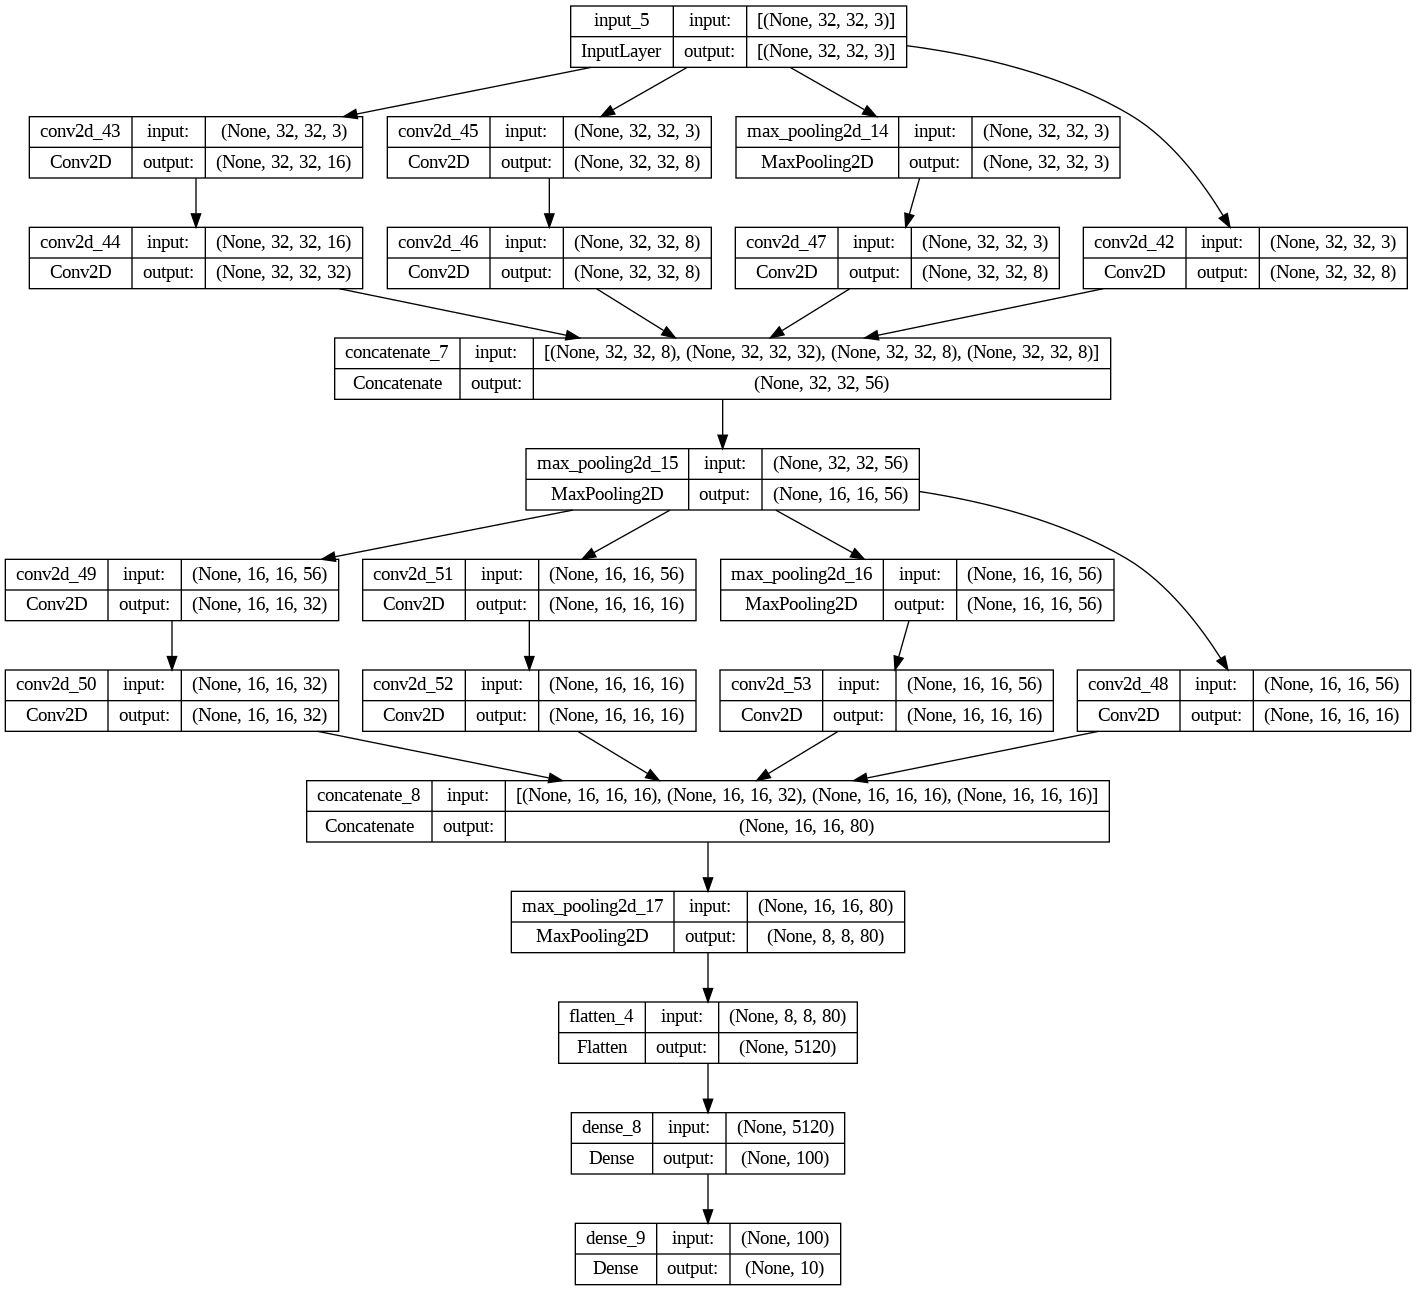

In [60]:
keras.utils.plot_model(model, to_file='model_summary.png', show_shapes=True, show_layer_names=True)

In [61]:
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 19s 10ms/step - loss: 2.7145 - accuracy: 0.3609
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4713 - accuracy: 0.4710
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3018 - accuracy: 0.5388
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1694 - accuracy: 0.5866
Epoch 5/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0666 - accuracy: 0.6254
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9760 - accuracy: 0.6588
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9037 - accuracy: 0.6853
Epoch 8/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8288 - accuracy: 0.7098
Epoch 9/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7644 - accuracy: 0.7334
Epoch 10/20
1563/1563 [==============================] - 13s 8ms/step - 

1/1 [==============================] - 0s 30ms/step


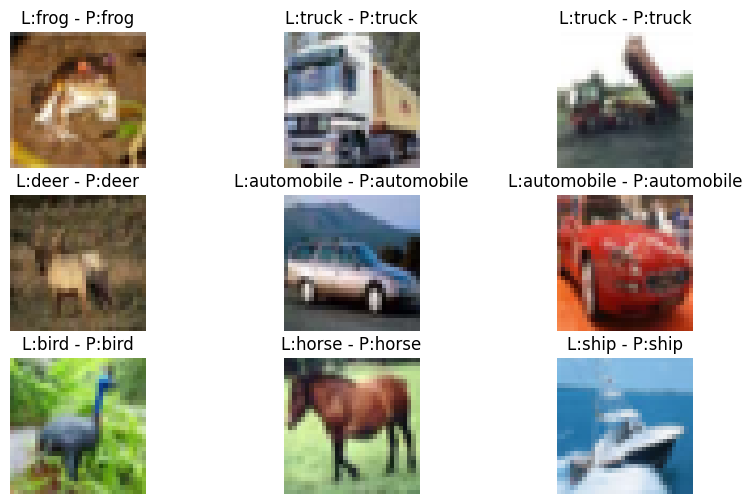

In [66]:
from numpy import argmax

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predictions = model.predict(x_train[:10])
fig = plt.figure(figsize=(10, 6))
for i in range(9):
  image, label, predict= x_train[i], y_train[i], predictions[i]
  fig.add_subplot(3, 3, i+1)
  plt.imshow(image)
  plt.title(f'L:{classes[argmax(label)]} - P:{classes[argmax(predict)]}')
  plt.axis('off')